<a href="https://colab.research.google.com/github/Cristvillanueva/Simulaci-n-II/blob/main/Aproximaci%C3%B3n%20al%20valor%20de%20pi%20con%20metodolog%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aproximación a $\pi$ por medio de Monte Carlo Acierto y Error (Hit or Miss) con METODOLOGÍA

\begin{equation*}
\begin{aligned}
 I = \int_0^1 \sqrt{1-x^2} \quad dx
\end{aligned}
\end{equation*}

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [74]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [75]:
def funcion(x): #Definimos la función a la cual le queremos calcular la integral en cierto intervalo.
    return math.sqrt(1-x**2)

In [76]:
def experimentos(n): #Definimos una funcion que realizara 
  a=0 #limite inferior de la integral
  b=1 #limite superior de la integral
  c = 2 #Funcion que acota por arriba la funcion a integrar.
  aciertos = 0 #Contador de la cantidad de veces que se cumple la condicion de monte carlo acierto y error.
  area=[] #Guardara las aproximaciones del área bajo la curva de la función.
  ensayos=[]
  for i in range(1,n+1):
      u1=(random.random()) #Generamos un número aleatorio en (0,1)
      u2=(random.random()) #Generamos un segundo número aleatorio e independiente en (0,1)
      x = (b-a)*u1+a #Utilizamos la tranformada inversa para traslar el U1 en el intervalo (0,1) al intervalo de interes (intervalo en donde se integra)
      g_x = funcion(x) #Evaluamos la función a integrar en el aleatorio X generado anteriormente. 
      if g_x > c*u2: #Condición de Monte Carlo de Acierto y Error. 
        aciertos += 1 #Si se cumple la condición anterior, aumenta el contador el 1.
      ensayos.append(i)
      area.append(c*(b-a)*aciertos*4/i) #Recordando que el área bajo la curva de esa integral nos da \pi/4, entonces necesitamos multiplicar
      #el área bajo la curva en cada iteración por 4 para aproximarnos al valor de pi. 
  return area #Regresamos una lista de las aproxiamciones al valor de pi en la iteracion i. 

In [77]:
exp = experimentos(2000) #Hara el experimento antes descrito 2000 veces, es decir, nos dara 2000 aproximaciones de pi.

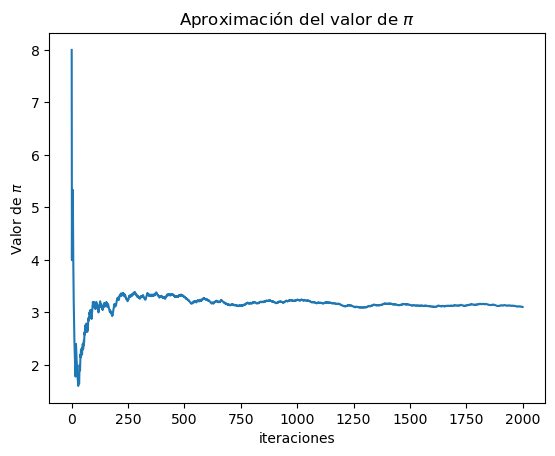

In [78]:
plt.plot(exp) #Grafica la lista de aproximaciones de acuerdo a la cantidad de experiemntos realizada.
plt.xlabel('iteraciones')
plt.ylabel('Valor de $\pi$')
plt.title('Aproximación del valor de $\pi$')
plt.show()

**PASO 8**. Replique el modelo.

In [79]:
def valor_pi(repeticiones): #Esta función hara la simulacion anterior muchas veces, es decir, hará "repeticiones" cantidad de veces
    Area = []
    for i in range(repeticiones):
        Area.append(np.mean(experimentos(2000))) #Calcula la media de 2000 experiementos unas N (repeticiones) cantidad de veces.
    return Area #Nos regresa N (repeticiones) medias de 2000 experiemntos cada una.

In [80]:
N=100
simulacion = valor_pi(N)

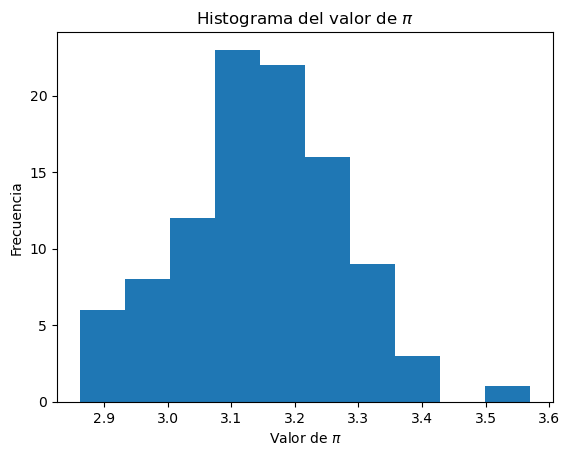

In [81]:
plt.hist(simulacion) #Grafica las frecuencias de la aproximación al valor de pi de las N simualciones con 2000 experiementos cada una.
plt.xlabel('Valor de $\pi$')
plt.ylabel('Frecuencia')
plt.title('Histograma del valor de $\pi$')
plt.show()

**PASO 9**. Calcule la media del valor de $\pi$ y su desviación
estándar.

In [82]:
media = np.mean(simulacion) #Calcula la media de esas N simulaciones
var = np.var(simulacion) #Calcula la varianza de esas N simulaciones
desv = np.std(simulacion) #Calcula la desvaicion de esas N simulaciones

**PASO 10**. Halle el intervalo de confianza del valor de $\pi$ con un nivel de confianza del $95 \%$.
\begin{equation*}
\overline{x}- Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}} < \mu < \overline{x}+ Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}}
\end{equation*}

In [83]:
from scipy.stats import norm #Importamos la libreria para poder obtener el valor de Z.
alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para \alpha/2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
l_inferior = media - z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite inferior por la formula
l_superior = media + z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite superior por la formula
print("Entonces: ", l_inferior, "< \u03BC <", l_superior) #El intervalo en donde se encuentra el valor real a una confienza del 95%

Entonces:  3.1243324198989244 < μ < 3.1739968619971233
